# Notebook for Managing Error and Complexity

In [8]:
# In this exercise we'll examine a learner which has high bias, and is incapable of
# learning the patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.

from sklearn.linear_model import LinearRegression
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.cross_validation import KFold
import numpy as np

%matplotlib inline

## 1. High Bias

In [25]:
# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv = KFold(size,shuffle=True)
scorer = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high bias
# Note for this quiz you do not need to create training and testing sets
X = np.reshape(np.random.normal(scale=2,size=size),(-1,1))
y = np.array([[1 - 2*x[0] +x[0]**2] for x in X])

Regressor score: 0.3239


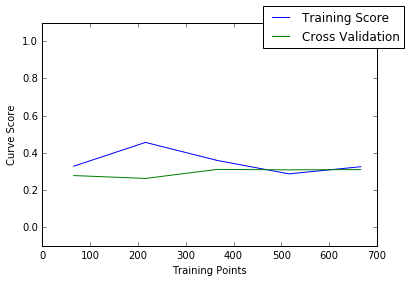

In [26]:
def plot_curve():
    reg = LinearRegression()
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
    
    # TODO: Use learning_curve imported above to create learning curves from X and y.
    # You will need to use 'cv_sets' and 'scorer' as parameters in the function.
    
    train_sizes, train_scores, test_scores = learning_curve(reg, X, y, cv=cv)
    
    # TODO: Plot the learning curves for both the training scores and testing scores.
    #       Use plt.plot() twice -- one for each score. Be sure to give them labels!
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label = 'Training Score')
    plt.plot(train_sizes, test_mean, label ='Cross Validation')
    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()
plot_curve()

## 2. High Variance

In [27]:
# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high variance
X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

Regressor score: 0.0037


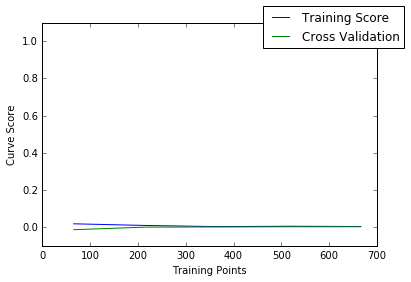

In [29]:
plot_curve()